In [2]:
from lab1.runners import *
from lab1.benchmark import BenchmarkResult
from numpy import cos
from numpy import exp
from numpy import pi

In [ ]:
%load_ext autoreload
%autoreload 2

### Сравнение методов

In [3]:
def f(x: float, y: float) -> float:
    # return x ** 3 * y ** 5 * (4 - x - 7 * y)
    # return scipy.optimize.rosen((x, y))
    return (x - 1) ** 2 + y ** 2
    # return x ** 2 + y ** 2

    # TARGET = Vector(4 / 3, 20 / 63)


GLOBAL_A = Coef.GEOMETRIC_PROGRESSION(0.1, 0.999)
GLOBAL_EXIT_CONDITION = ExitCondition.NORM(Metric.EUCLID, 0.0001)

In [8]:
TARGET = Vector(1, 0)
PROBLEM = Oracle(f, TARGET)
b = BenchmarkResult.compare(RunnerMeta.runners, dict(
    o=PROBLEM,
    start=Vector(2, 1),
    a=GLOBAL_A,
    exit_condition=GLOBAL_EXIT_CONDITION
))

--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


In [9]:
b.top("accuracy", "time", "queries")

sorted by accuracy
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateDescendImprovedRunner | 0.00000000 |       175 | 0.00113080 |
| CoordinateGradientRunner        | 0.00000014 |       158 | 0.00095100 |
| NelderMeadRunner                | 0.00446726 |        73 | 0.00340630 |
| CoordinateDescendRunner         | 0.03792782 |       177 | 0.00087150 |
| GradientDescendRunner           | 0.05680405 |       215 | 0.00060830 |

sorted by time
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| GradientDescendRunner           | 0.05680405 |       215 | 0.00060830 |
| CoordinateDescendRunner         | 0.03792782 |       177 | 0.00087150 |
| CoordinateGradientRunner        | 0.00000014 |       158 | 0.00095100 |
| CoordinateDescendImprovedRunner | 0.00000000 |       175 | 0.00113080 |
| N

Посмотрим на более интересные функции

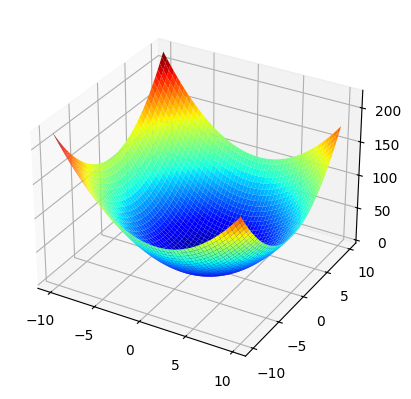

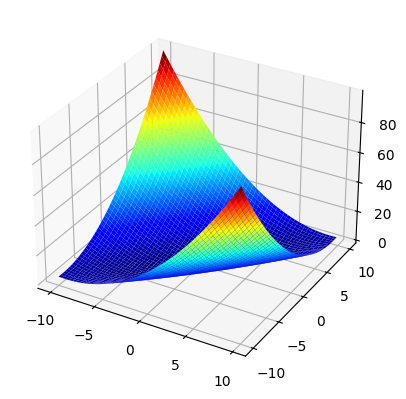

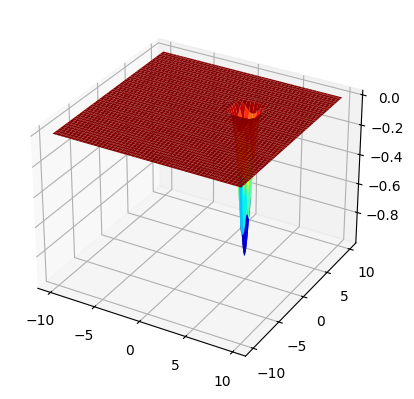

In [6]:
from numpy import cos
from numpy import exp
from numpy import pi


def f1(x, y):
    return 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y


def f2(x, y):
    return -cos(x) * cos(y) * exp(-((x - pi) ** 2 + (y - pi) ** 2))


plot(f)
plot(f1)
plot(f2)

In [7]:
fs = [f, f1, f2]

_params_base = dict(
    start=Vector(*([3] * 2)),
    a=GLOBAL_A,
    exit_condition=GLOBAL_EXIT_CONDITION
)

params = [
    dict(**_params_base, o=Oracle(f, Vector(1, 0))),
    dict(**_params_base, o=Oracle(f1, Vector(0, 0))),
    dict(**_params_base, o=Oracle(f2, Vector(pi, pi))),
]
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


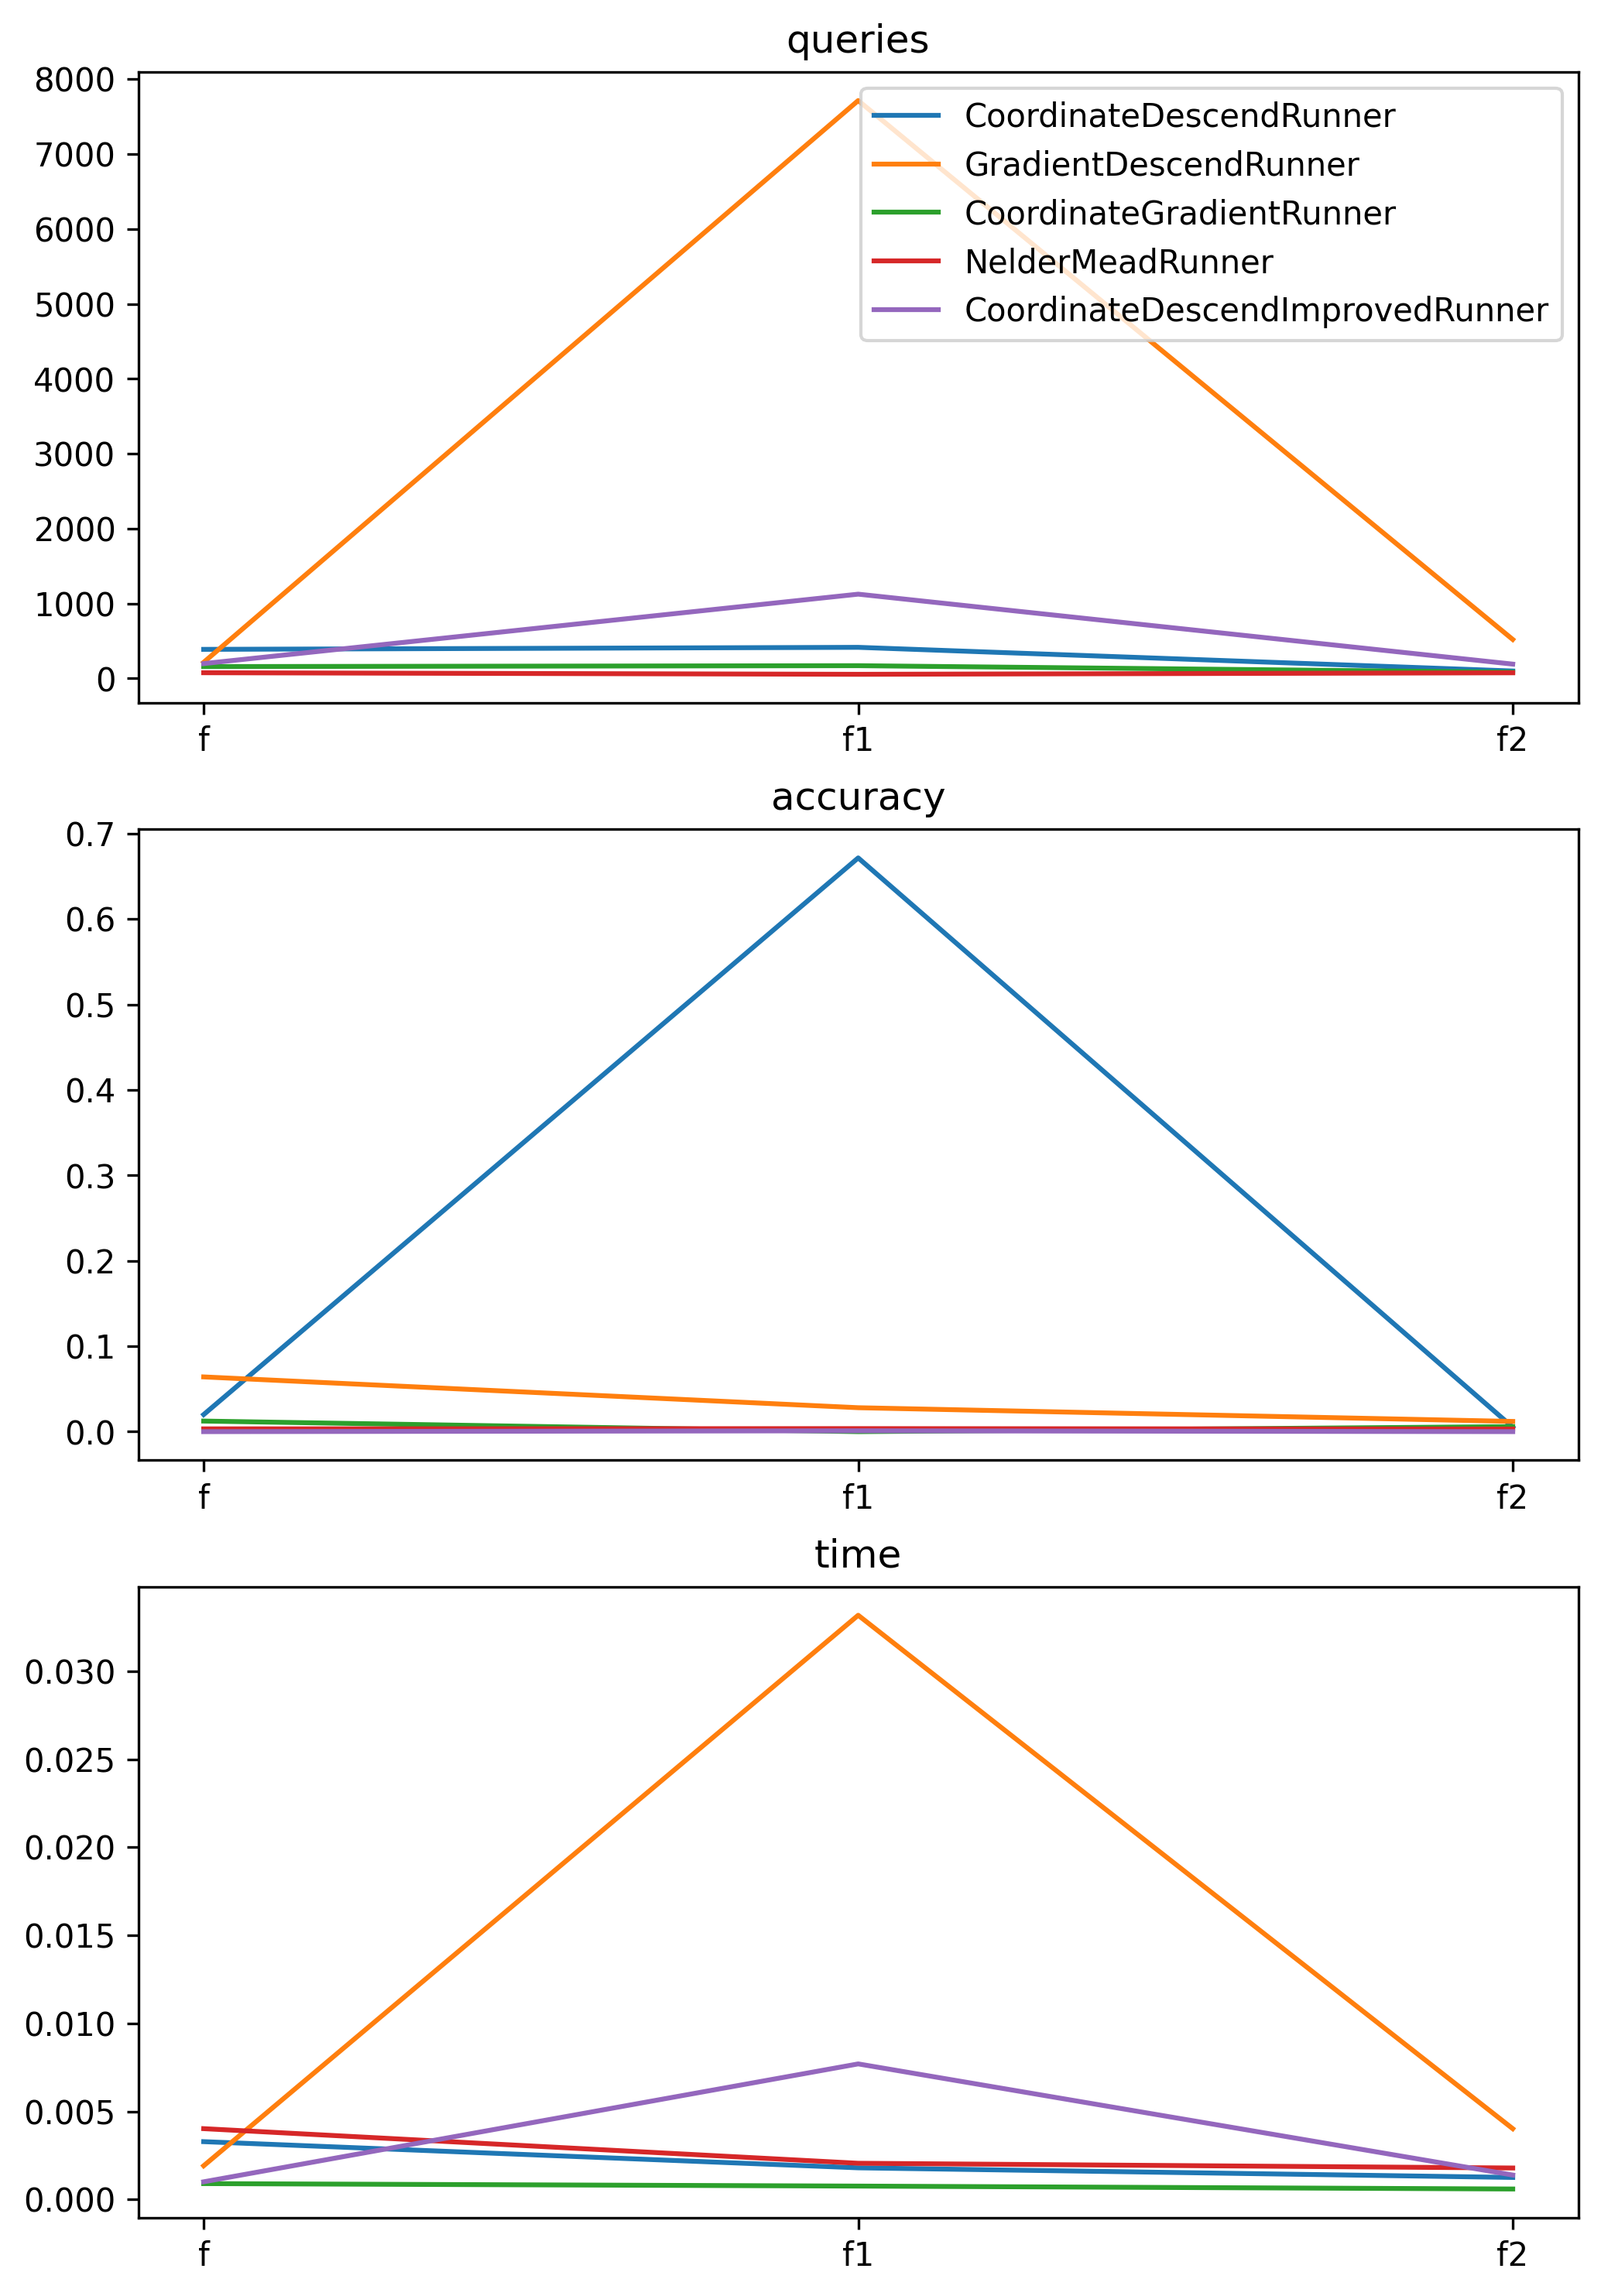

In [8]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(lambda el: el.__name__, fs)))

In [9]:
bs[1].top("queries", "accuracy", "time")

sorted by queries
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| NelderMeadRunner                | 0.00356497 |        55 | 0.00205340 |
| CoordinateGradientRunner        | 0.00000004 |       170 | 0.00075780 |
| CoordinateDescendRunner         | 0.67161702 |       415 | 0.00179410 |
| CoordinateDescendImprovedRunner | 0.00099358 |      1125 | 0.00769640 |
| GradientDescendRunner           | 0.02801962 |      7715 | 0.03317370 |

sorted by accuracy
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateGradientRunner        | 0.00000004 |       170 | 0.00075780 |
| CoordinateDescendImprovedRunner | 0.00099358 |      1125 | 0.00769640 |
| NelderMeadRunner                | 0.00356497 |        55 | 0.00205340 |
| GradientDescendRunner           | 0.02801962 |      7715 | 0.03317370 |


`GradientDescendRunner` не справился со 2 функцией
В среднем `CoordinateDescendImprovedRunner` и `CoordinateGradientRunner` лидируют

### N-мерные пространства

In [14]:
ns = range(2, 11)

params = []
for n in ns:
    def f(*args):
        return sum(map(lambda a: a ** 2, args))


    TARGET = Vector(*([0] * n))
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=GLOBAL_A,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series(RunnerMeta.runners, params)



running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

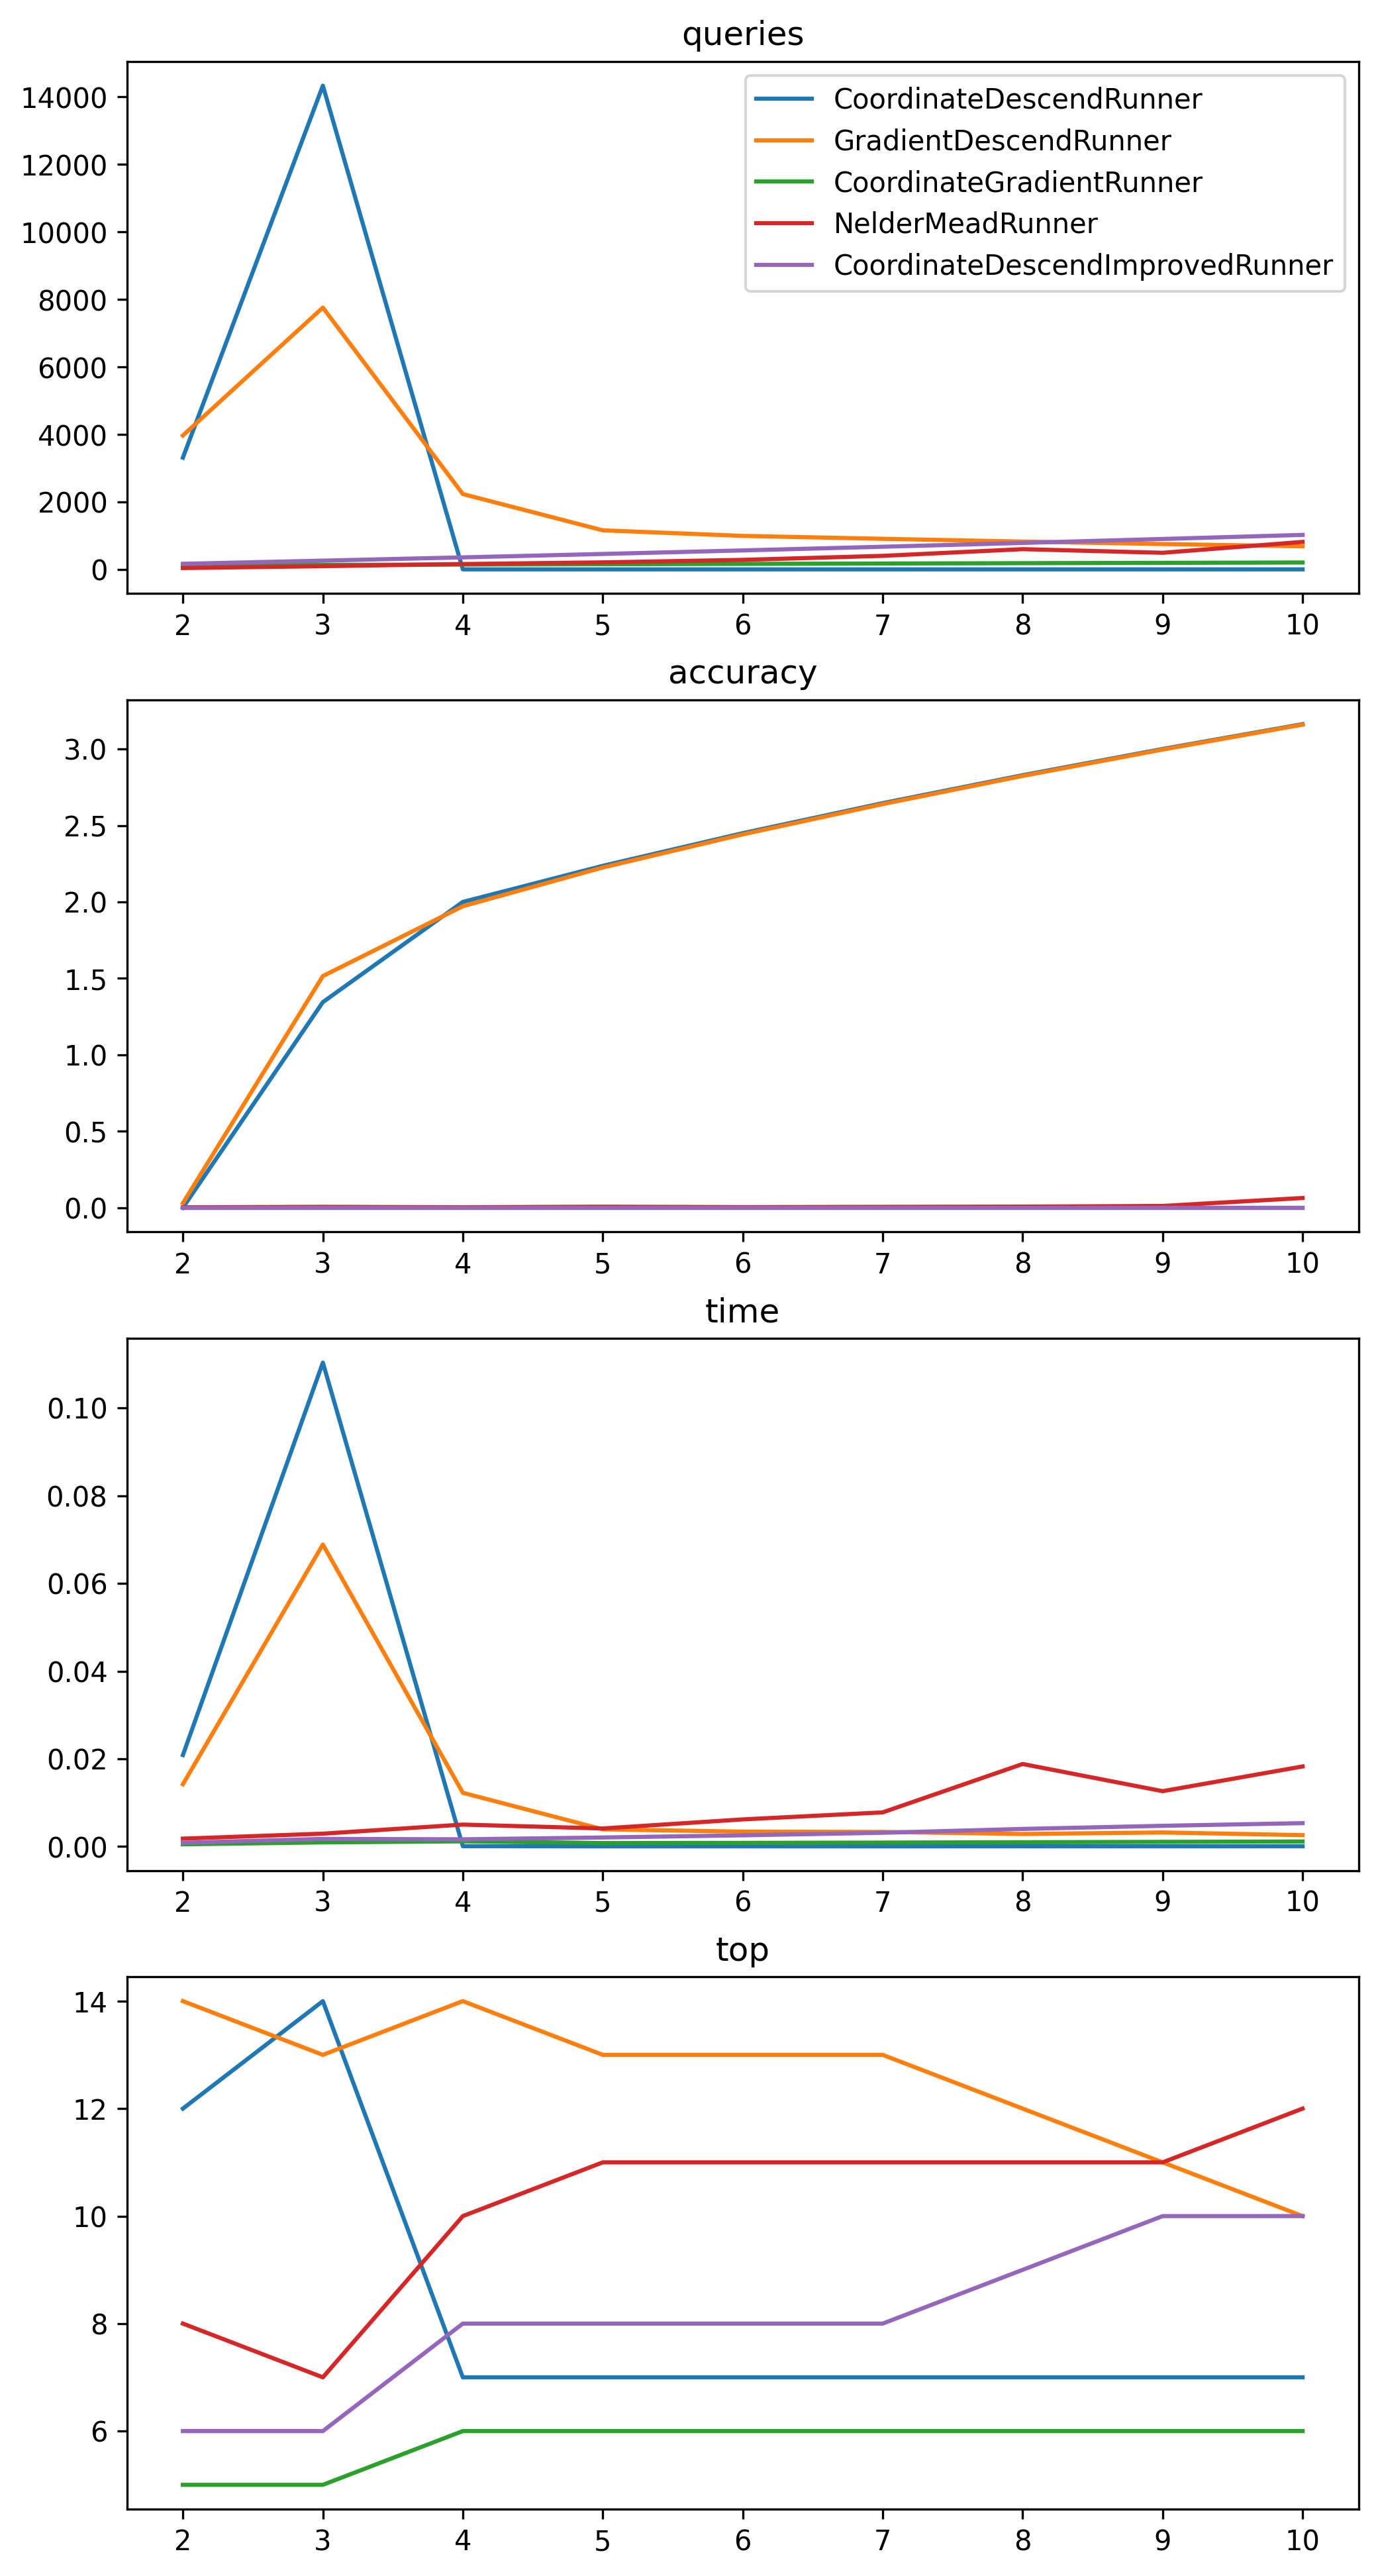

In [15]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time", "top"), names=list(map(str, ns)))

`CoordinateDescendRunner` и `GradientDescendRunner` оказались не очень устойчивыми к увеличению размерности пространства
Посмотрим на оставшиеся поближе

running experiment 1
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 2
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 3
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 4
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 5
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 6
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 7
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 8
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner


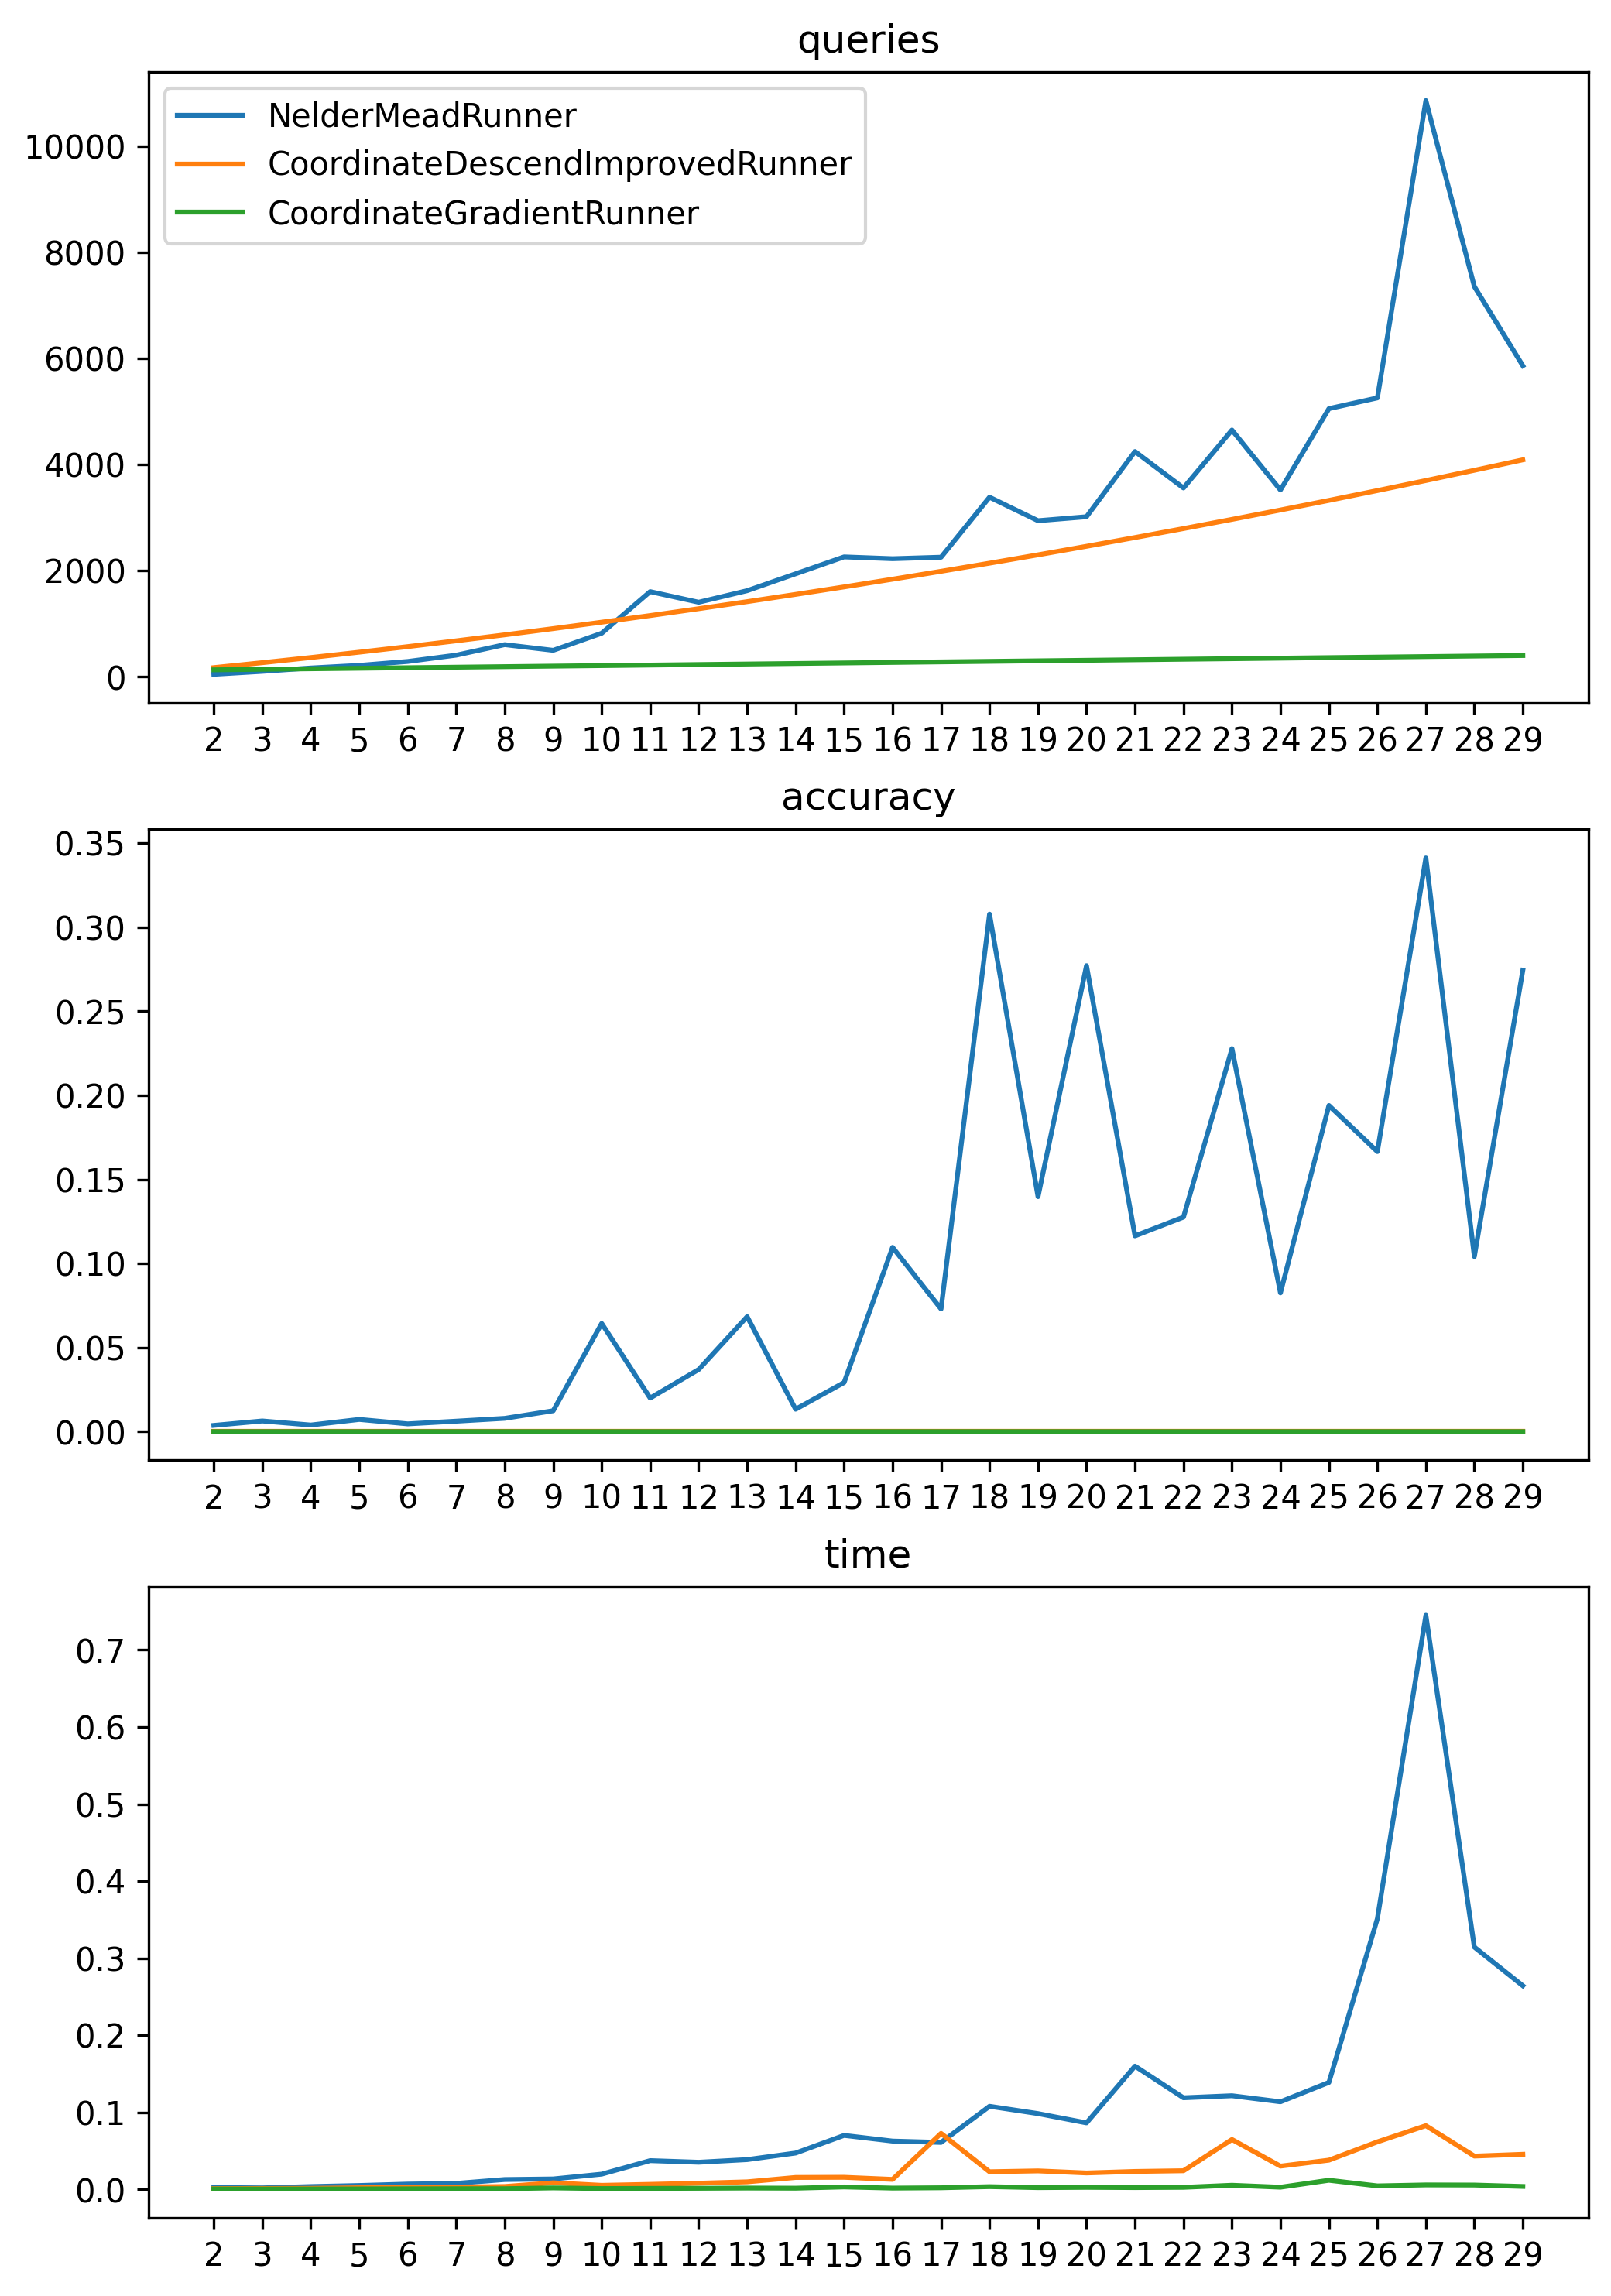

In [18]:
ns = range(2, 30)

params = []
for n in ns:
    def f(*args):
        return sum(map(lambda a: a ** 2, args))


    TARGET = Vector(*([0] * n))
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=GLOBAL_A,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series((NelderMeadRunner, CoordinateDescendImprovedRunner, CoordinateGradientRunner), params)

BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, ns)))

`CoordinateGradientRunner` оказался самым эффективным в многомерных пространствах, `CoordinateDescendImprovedRunner` показывает себя чуть хуже

### Зашумленные значения

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

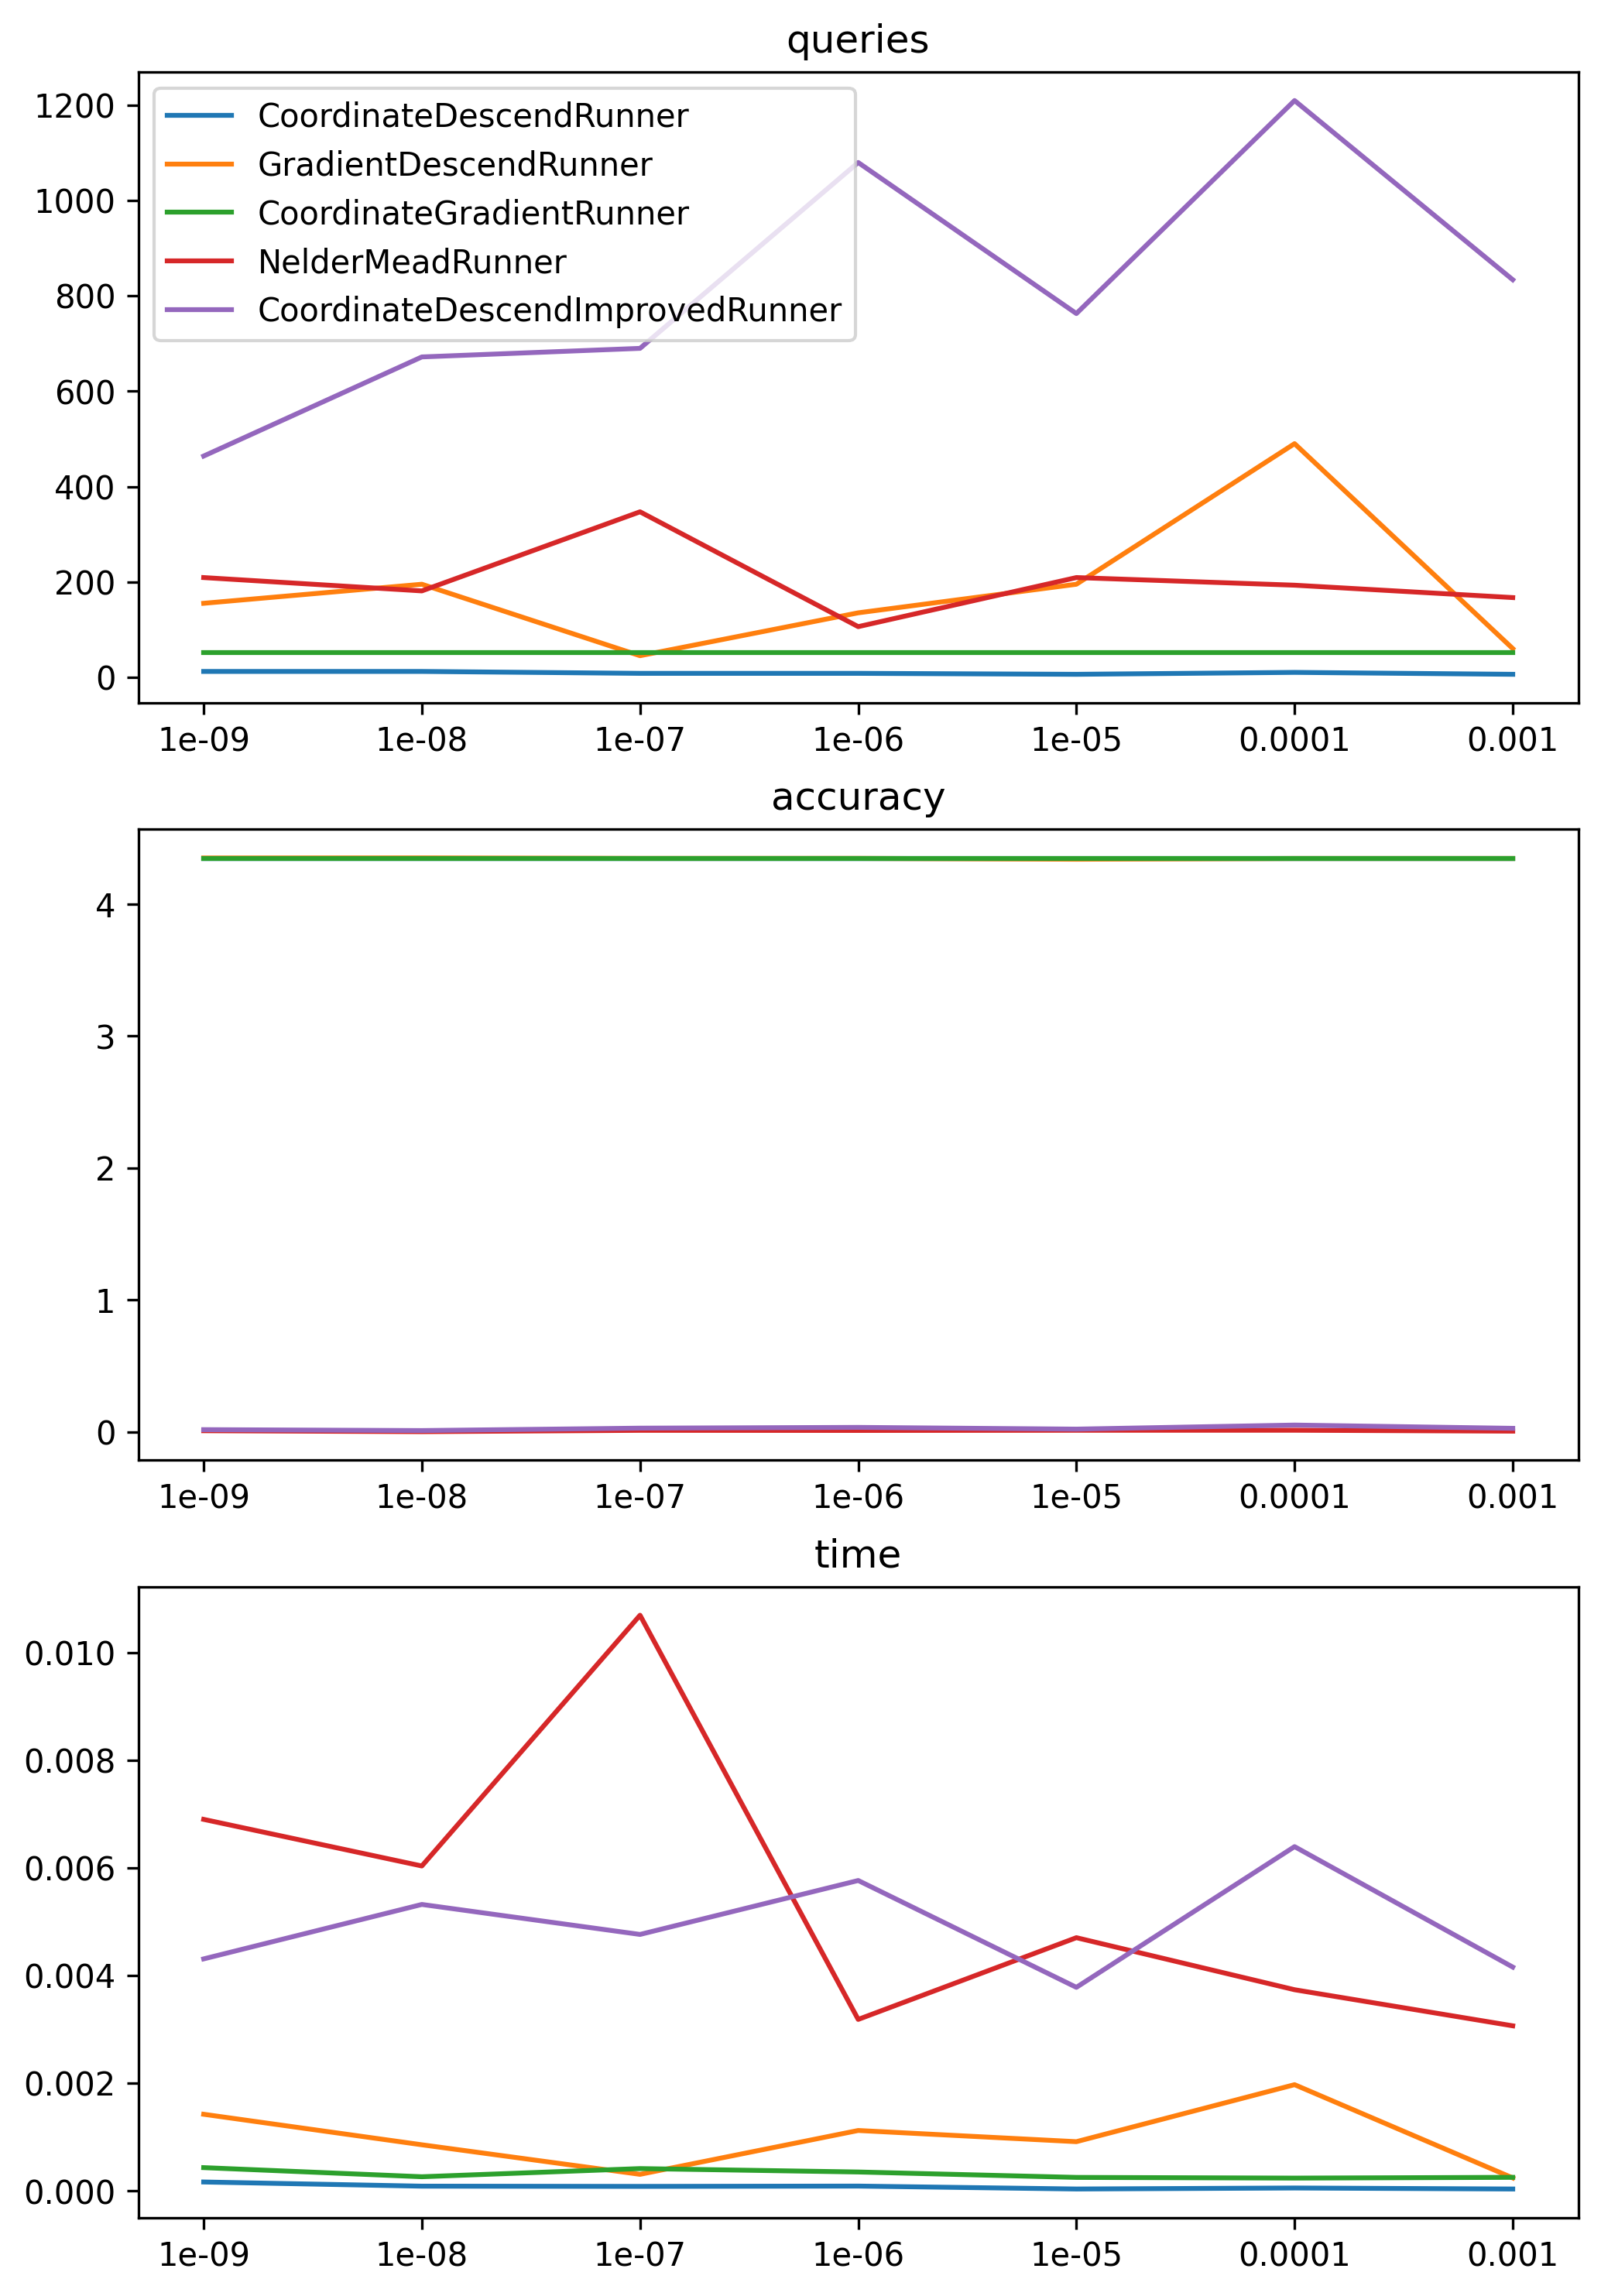

In [21]:
import random


def eps(mx):
    r = random.randint(0, 1000)
    return (-1 ** r) * r / 1000 * mx


mxs = list(reversed([10 ** (-i) for i in range(3, 10)]))

params = []
n = 2


def f(x, y):
    return (x - 2) ** 2 + (y + 1) ** 2 + x * y + eps(mx)


for mx in mxs:
    TARGET = Vector(10 / 3, -8 / 3)
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=GLOBAL_A,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series(RunnerMeta.runners, params)

BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, mxs)))

Устойчивыми к шуму оказались `NelderMeadRunner` и `CoordinateDescendImprovedRunner` посмотрим на них ближе

running experiment 1
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 7
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


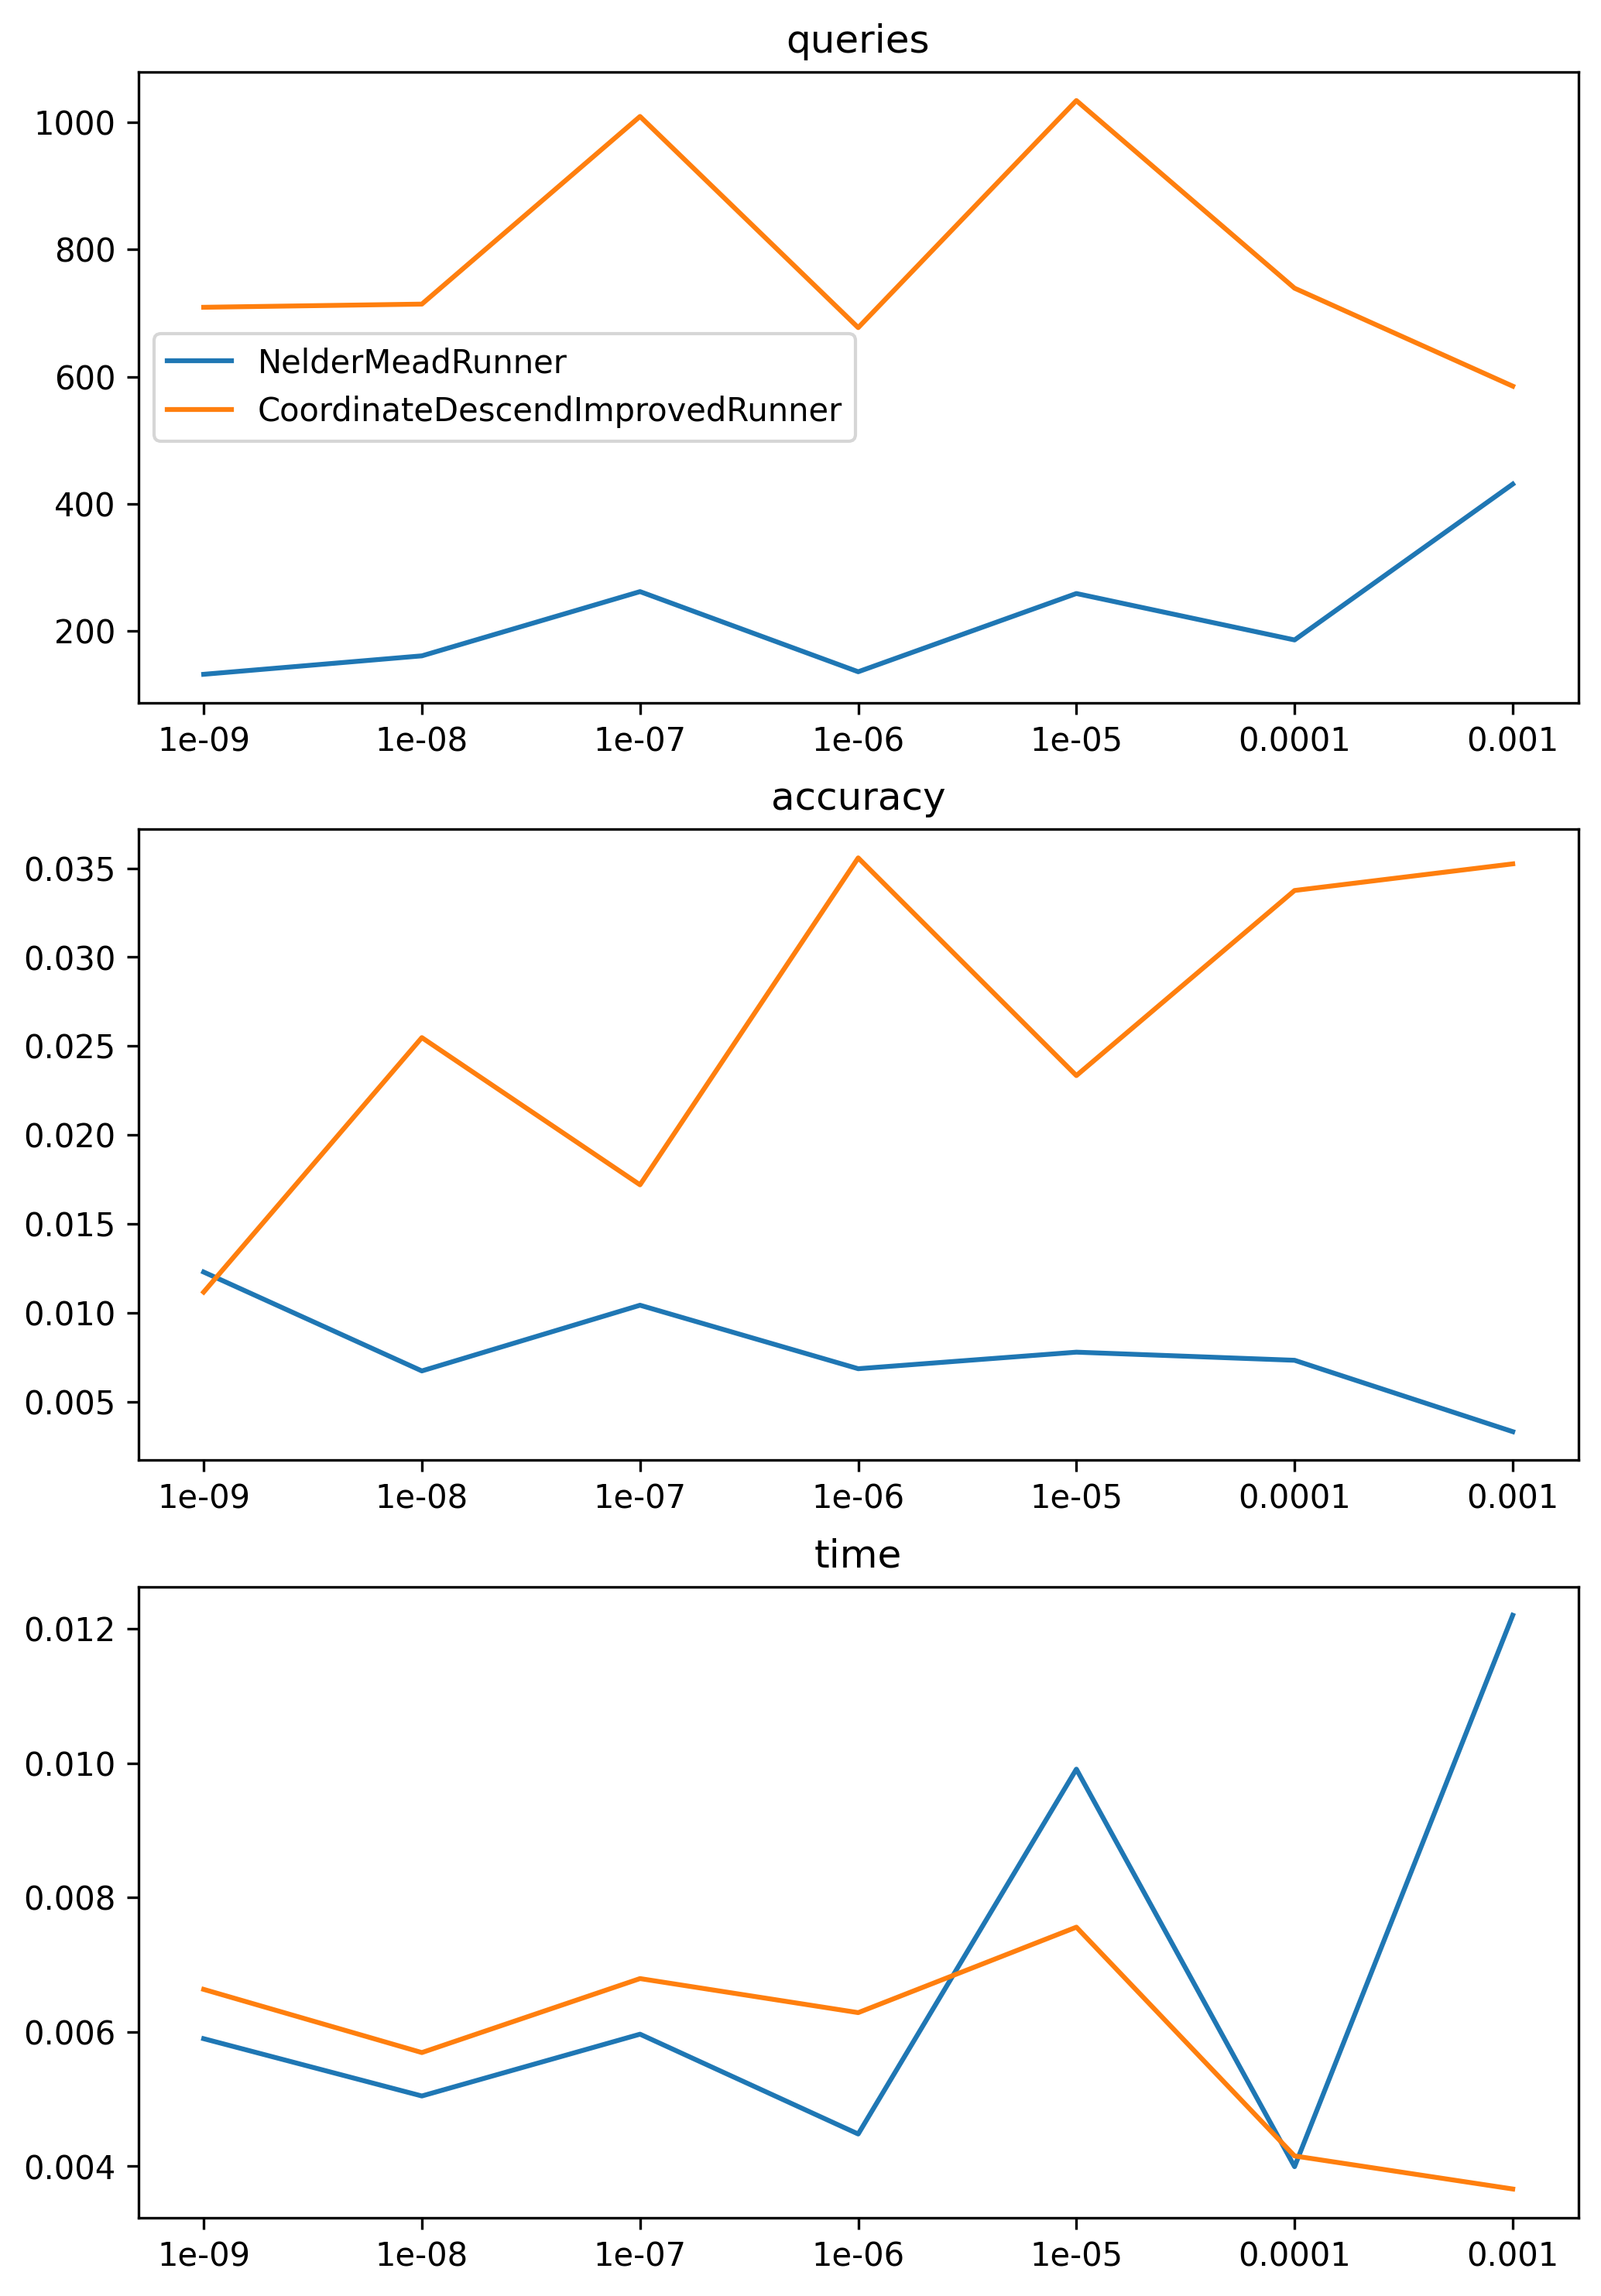

In [22]:
bs = BenchmarkResult.series((NelderMeadRunner, CoordinateDescendImprovedRunner), params)
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, mxs)))

Результаты разнятся от запуска к запуску, но в среднем `NelderMeadRunner` оказывается чуть лучше

### мультимодальные функции

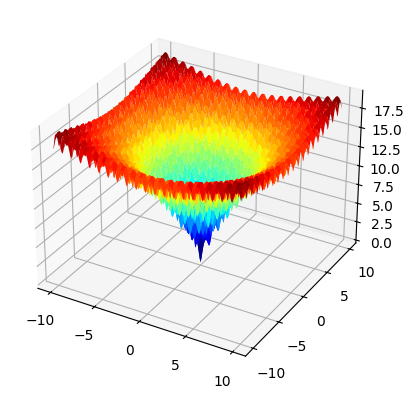

In [23]:
def m1(x, y):
    return -20.0 * exp(-0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) - exp(
        0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + np.e + 20


plot(m1)

In [24]:
# for mx in mxs:
#     TARGET = Vector(10 / 3, -8 / 3)
#     params.append(dict(
#         o=Oracle(f, TARGET),
#         start=Vector(*([1] * n)),
#         a=Coef.CONST(0.0001),
#         exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
#     ))
# (GradientDescendRunner, CoordinateGradientRunner)
b = BenchmarkResult.compare(RunnerMeta.runners, dict(
    o=Oracle(m1, Vector(0, 0)),
    start=Vector(3, 3),
    a=GLOBAL_A,
    exit_condition=GLOBAL_EXIT_CONDITION
))

# BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, mxs)))

--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


In [25]:
b.top("queries", "accuracy", "time")

sorted by queries
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateDescendRunner         | 4.24264060 |        10 | 0.00019530 |
| GradientDescendRunner           | 4.24264059 |        10 | 0.00009350 |
| NelderMeadRunner                | 4.21158218 |        74 | 0.00410890 |
| CoordinateGradientRunner        | 4.21325892 |       102 | 0.00139590 |
| CoordinateDescendImprovedRunner | 0.00000000 |       203 | 0.00175620 |

sorted by accuracy
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateDescendImprovedRunner | 0.00000000 |       203 | 0.00175620 |
| NelderMeadRunner                | 4.21158218 |        74 | 0.00410890 |
| CoordinateGradientRunner        | 4.21325892 |       102 | 0.00139590 |
| GradientDescendRunner           | 4.24264059 |        10 | 0.00009350 |


Справился только `CoordinateDescendImprovedRunner`
посмотрим, что будет если менять точку старта

In [27]:
points = [Vector(i, i * (-1) ** i) for i in range(1, 10)]
TARGET = Vector(0, 0)
params = []
for p in points:
    params.append(dict(
        o=Oracle(m1, TARGET),
        start=p,
        a=GLOBAL_A,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

sorted by accuracy
| name                            |    accuracy |   queries |       time |
|---------------------------------+-------------+-----------+------------|
| CoordinateDescendImprovedRunner |  0.00000000 |       269 | 0.00212810 |
| CoordinateGradientRunner        | 12.71918908 |       102 | 0.00080990 |
| NelderMeadRunner                | 12.72252530 |        96 | 0.00237020 |
| CoordinateDescendRunner         | 12.72792199 |        10 | 0.00008580 |
| GradientDescendRunner           | 12.72792204 |        10 | 0.00007510 |


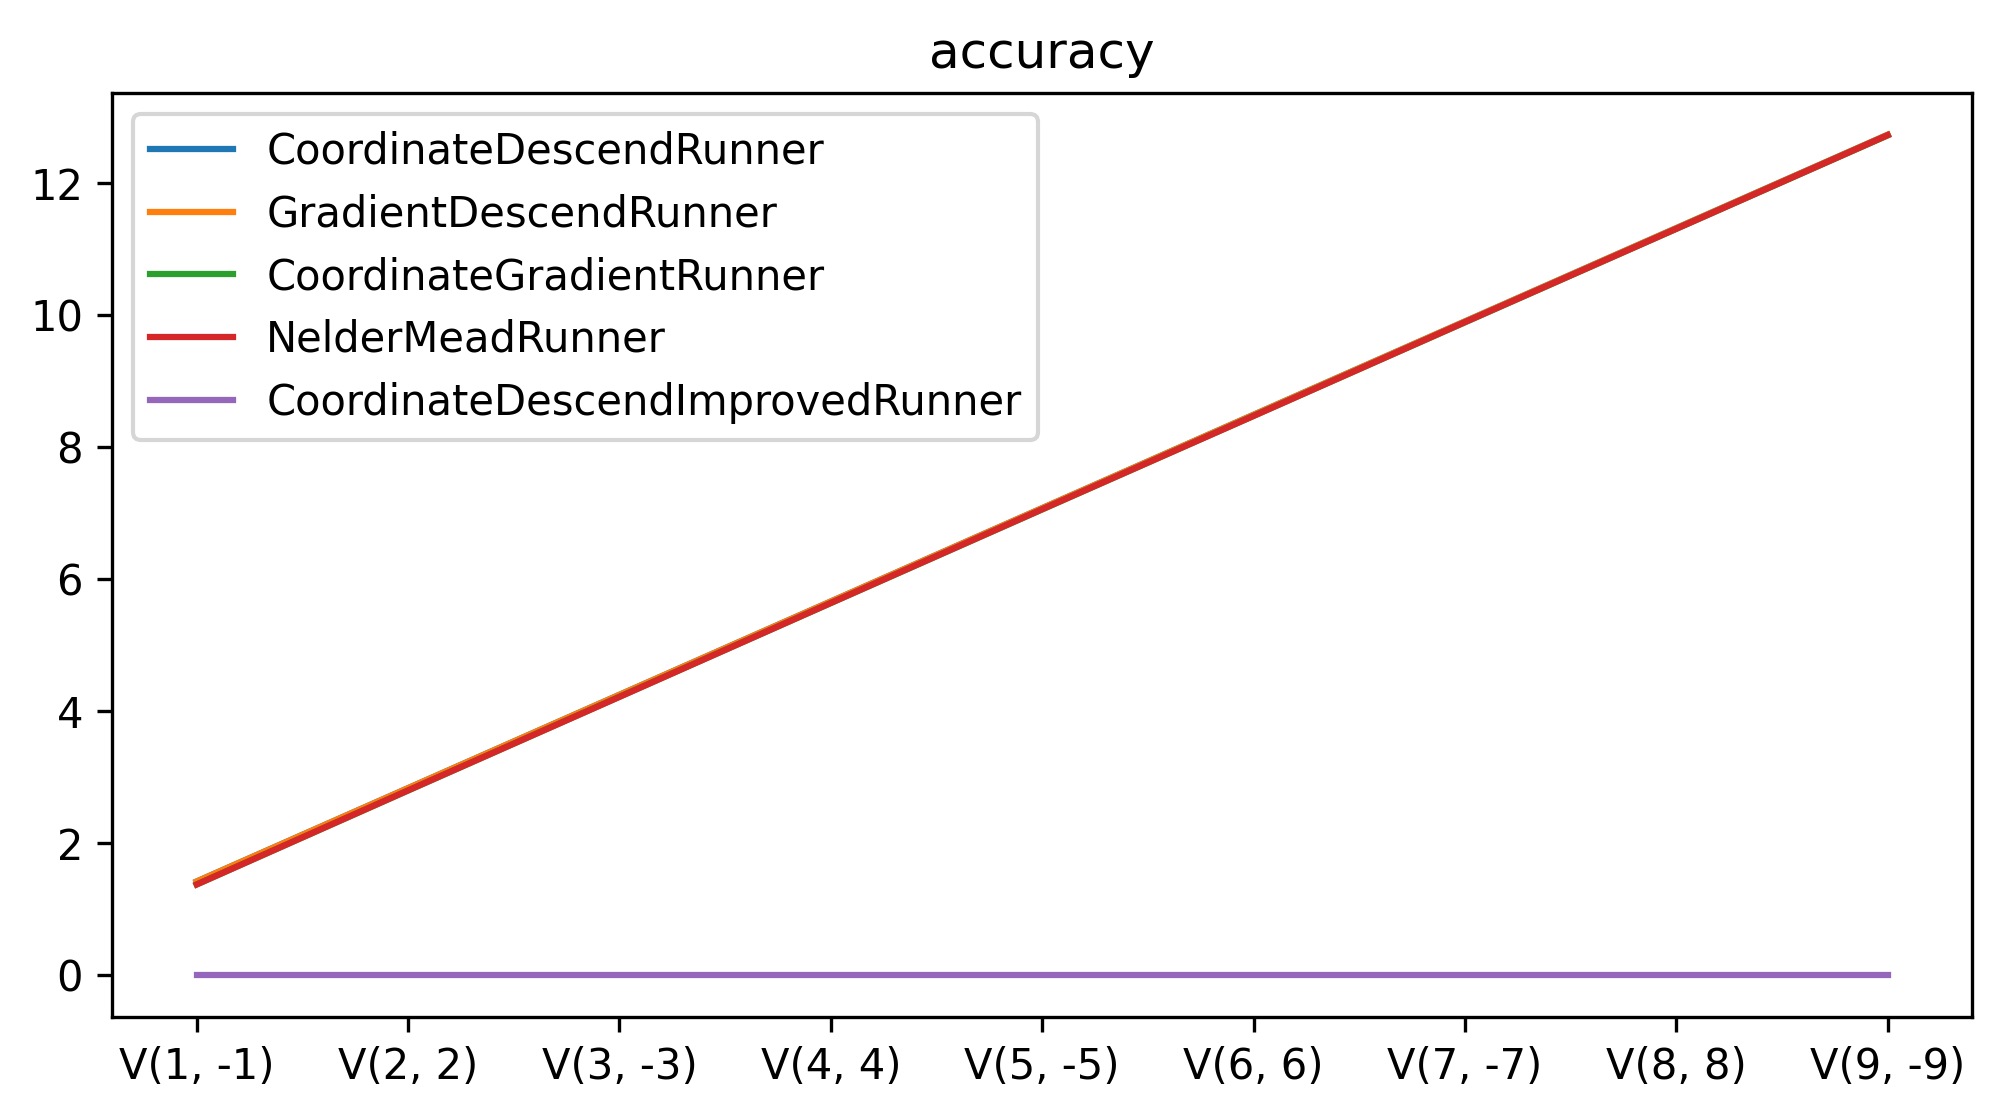

In [28]:
bs[-1].top("accuracy", total=False)
BenchmarkResult.plot_results(bs, ("accuracy",), names=list(map(str, points)))

Справляется только `CoordinateDescendImprovedRunner`

Точность (расстояние до реального минимума): 0.00000000
Кол-во запросов к оракулу: 269
Время: 0.0035 с


D:\prog\itmo_ct\4-sem\metopt\lab1\runners\utils.py:332: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
D:\prog\itmo_ct\4-sem\metopt\lab1\runners\utils.py:352: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


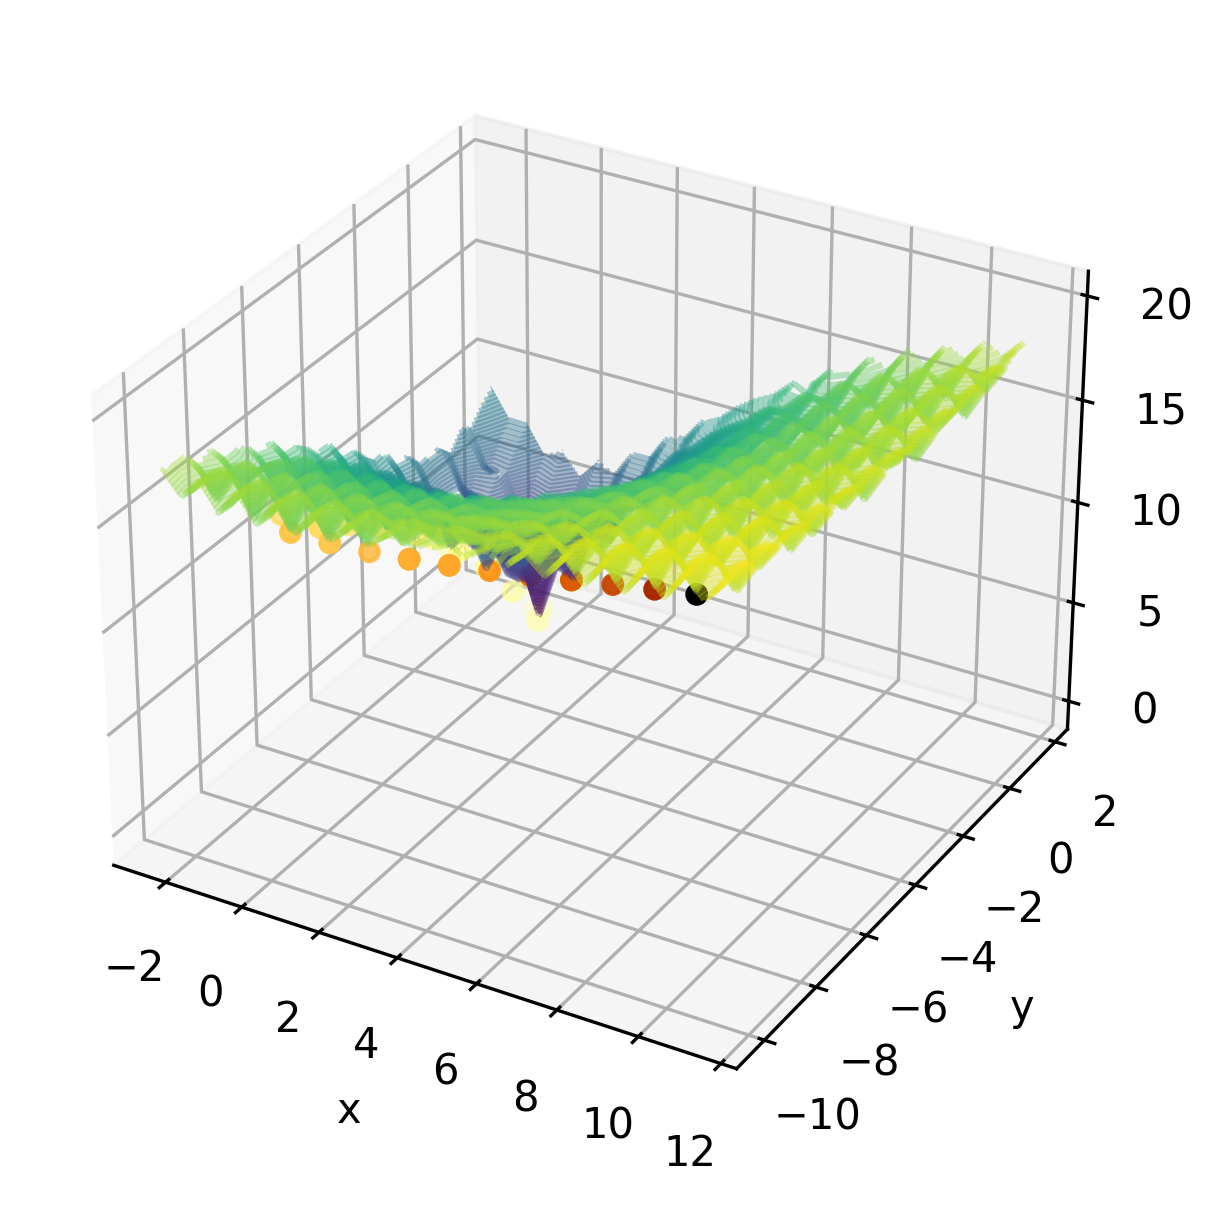

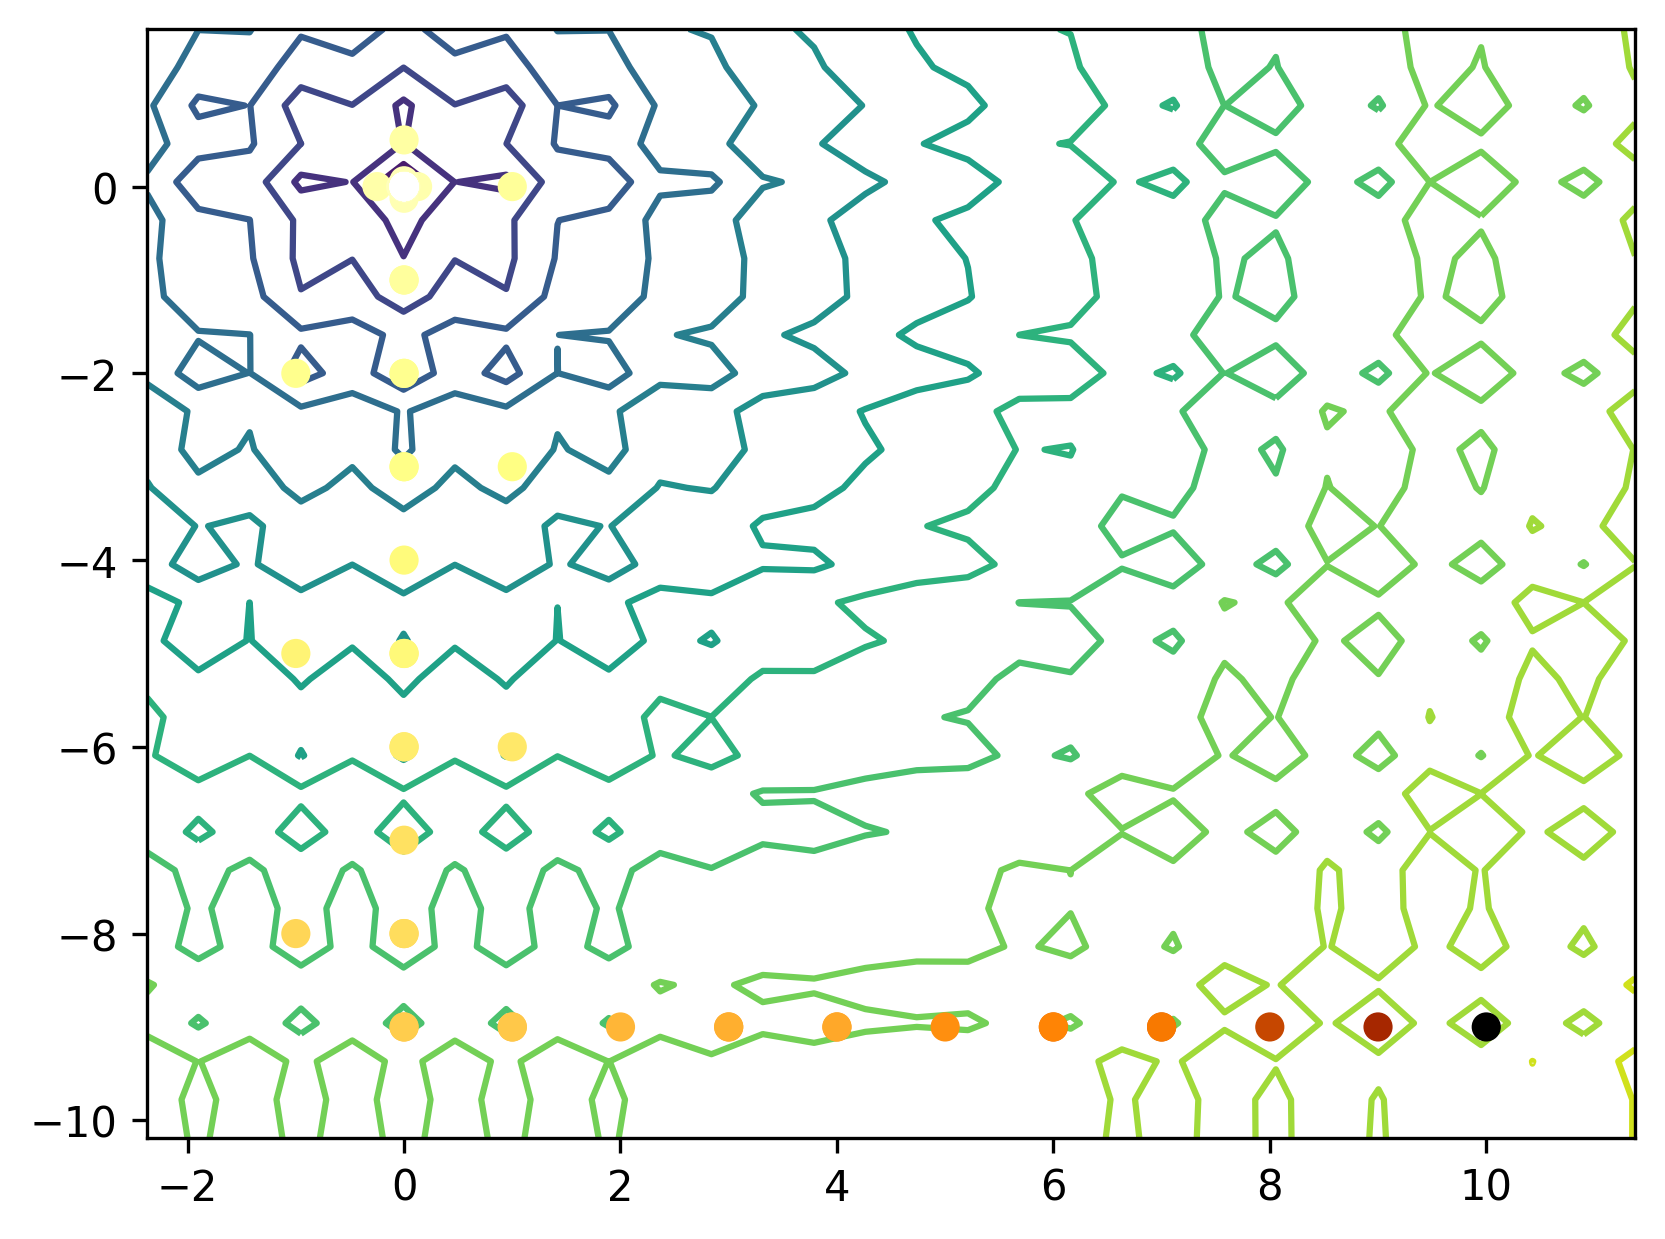

In [29]:
runner = CoordinateDescendImprovedRunner(
    o=Oracle(m1, TARGET),
    start=Vector(9, -9),
    a=GLOBAL_A,
    exit_condition=GLOBAL_EXIT_CONDITION
)
runner.experiment(False, points=100, plt_cfg=PlotConfig(3, -3, dpi=300))

### Эффективность методов в зависимости от шага и условия выхода  

In [19]:
as_ = (
        [(Coef.CONST(10 ** (-i)), f"C({i})") for i in range(1, 5)] +
        [(Coef.GEOMETRIC_PROGRESSION(0.1, 1 - 10 ** (-i)), f"G({i})") for i in range(3, 8)]
)
TARGET = Vector(0, 0)
params = []
names = []
for a, name in as_:
    names.append(name)
    params.append(dict(
        o=Oracle(f1, TARGET),
        start=Vector(3, 3),
        a=a,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

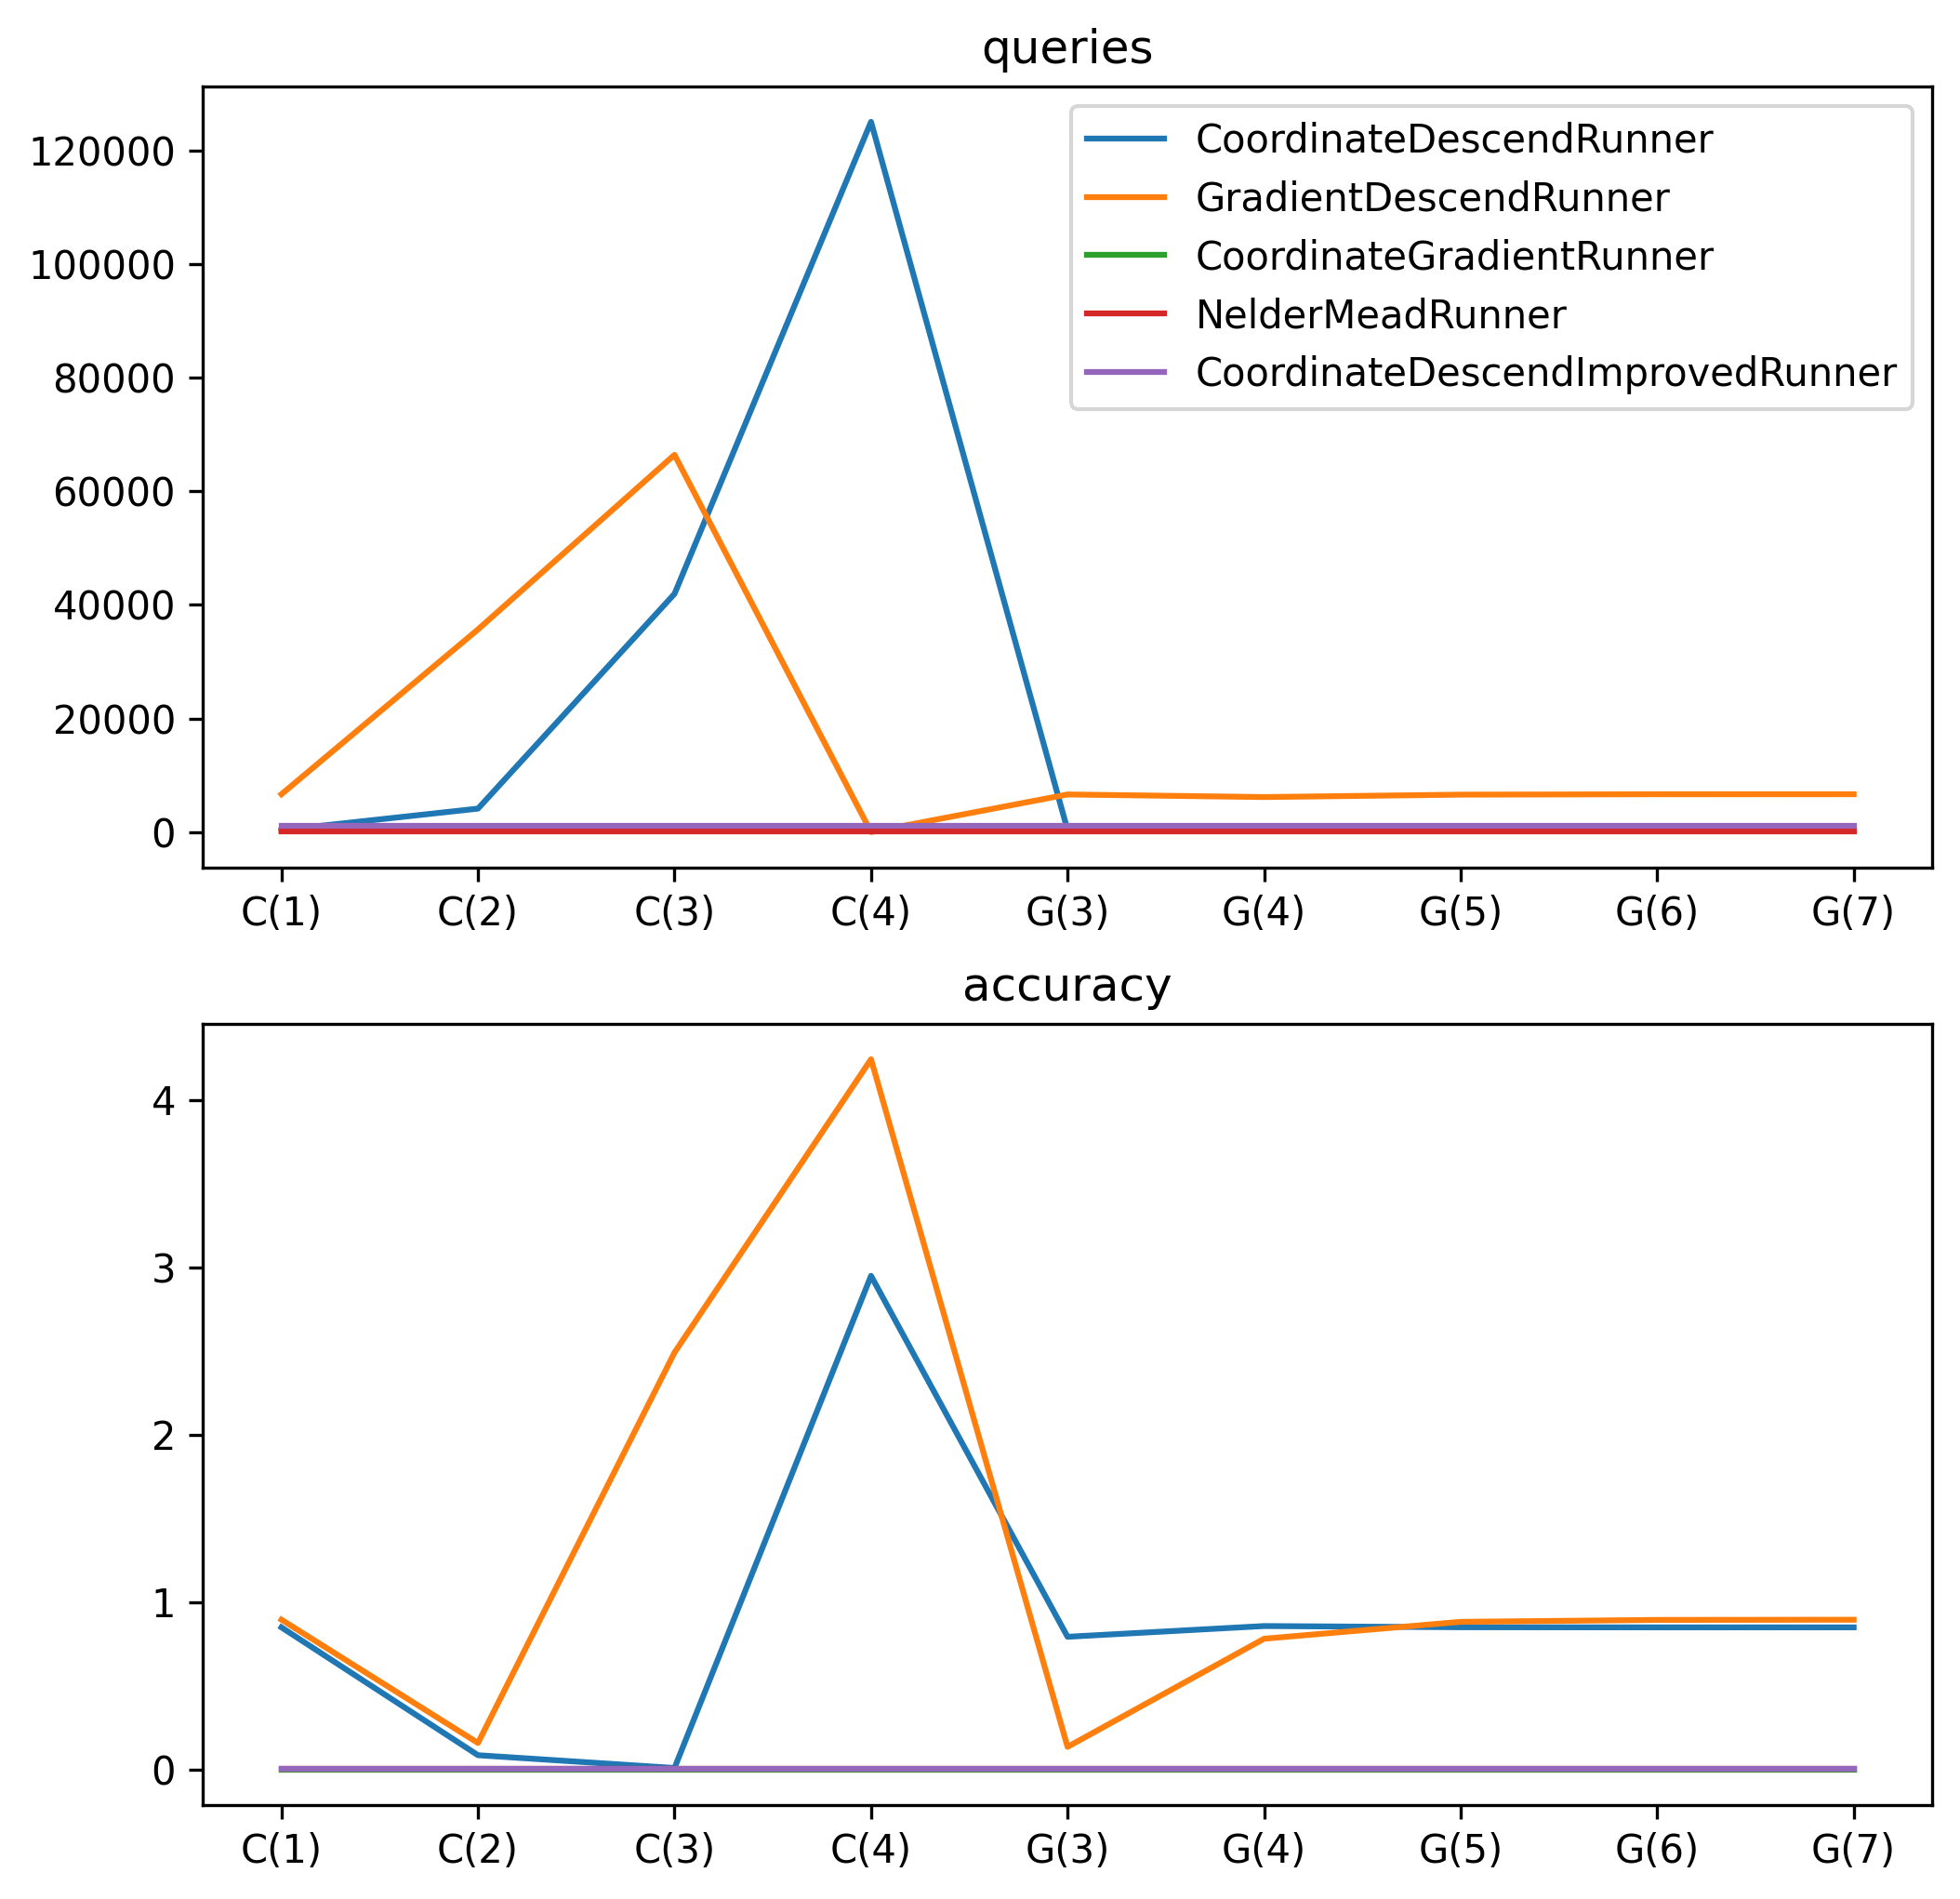

In [20]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy"), names)

In [24]:
es_ = (
        [(ExitCondition.NORM(Metric.EUCLID, 10 ** (-i)), f"N({i})") for i in range(3, 8)] +
        [(ExitCondition.DELTA(10 ** (-i)), f"D({i})") for i in range(3, 8)]
)
    
TARGET = Vector(0, 0)
params = []
names = []
for e, name in es_:
    names.append(name)
    params.append(dict(
        o=Oracle(f1, TARGET),
        start=Vector(3, 3),
        a=GLOBAL_A,
        exit_condition=e
    ))
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

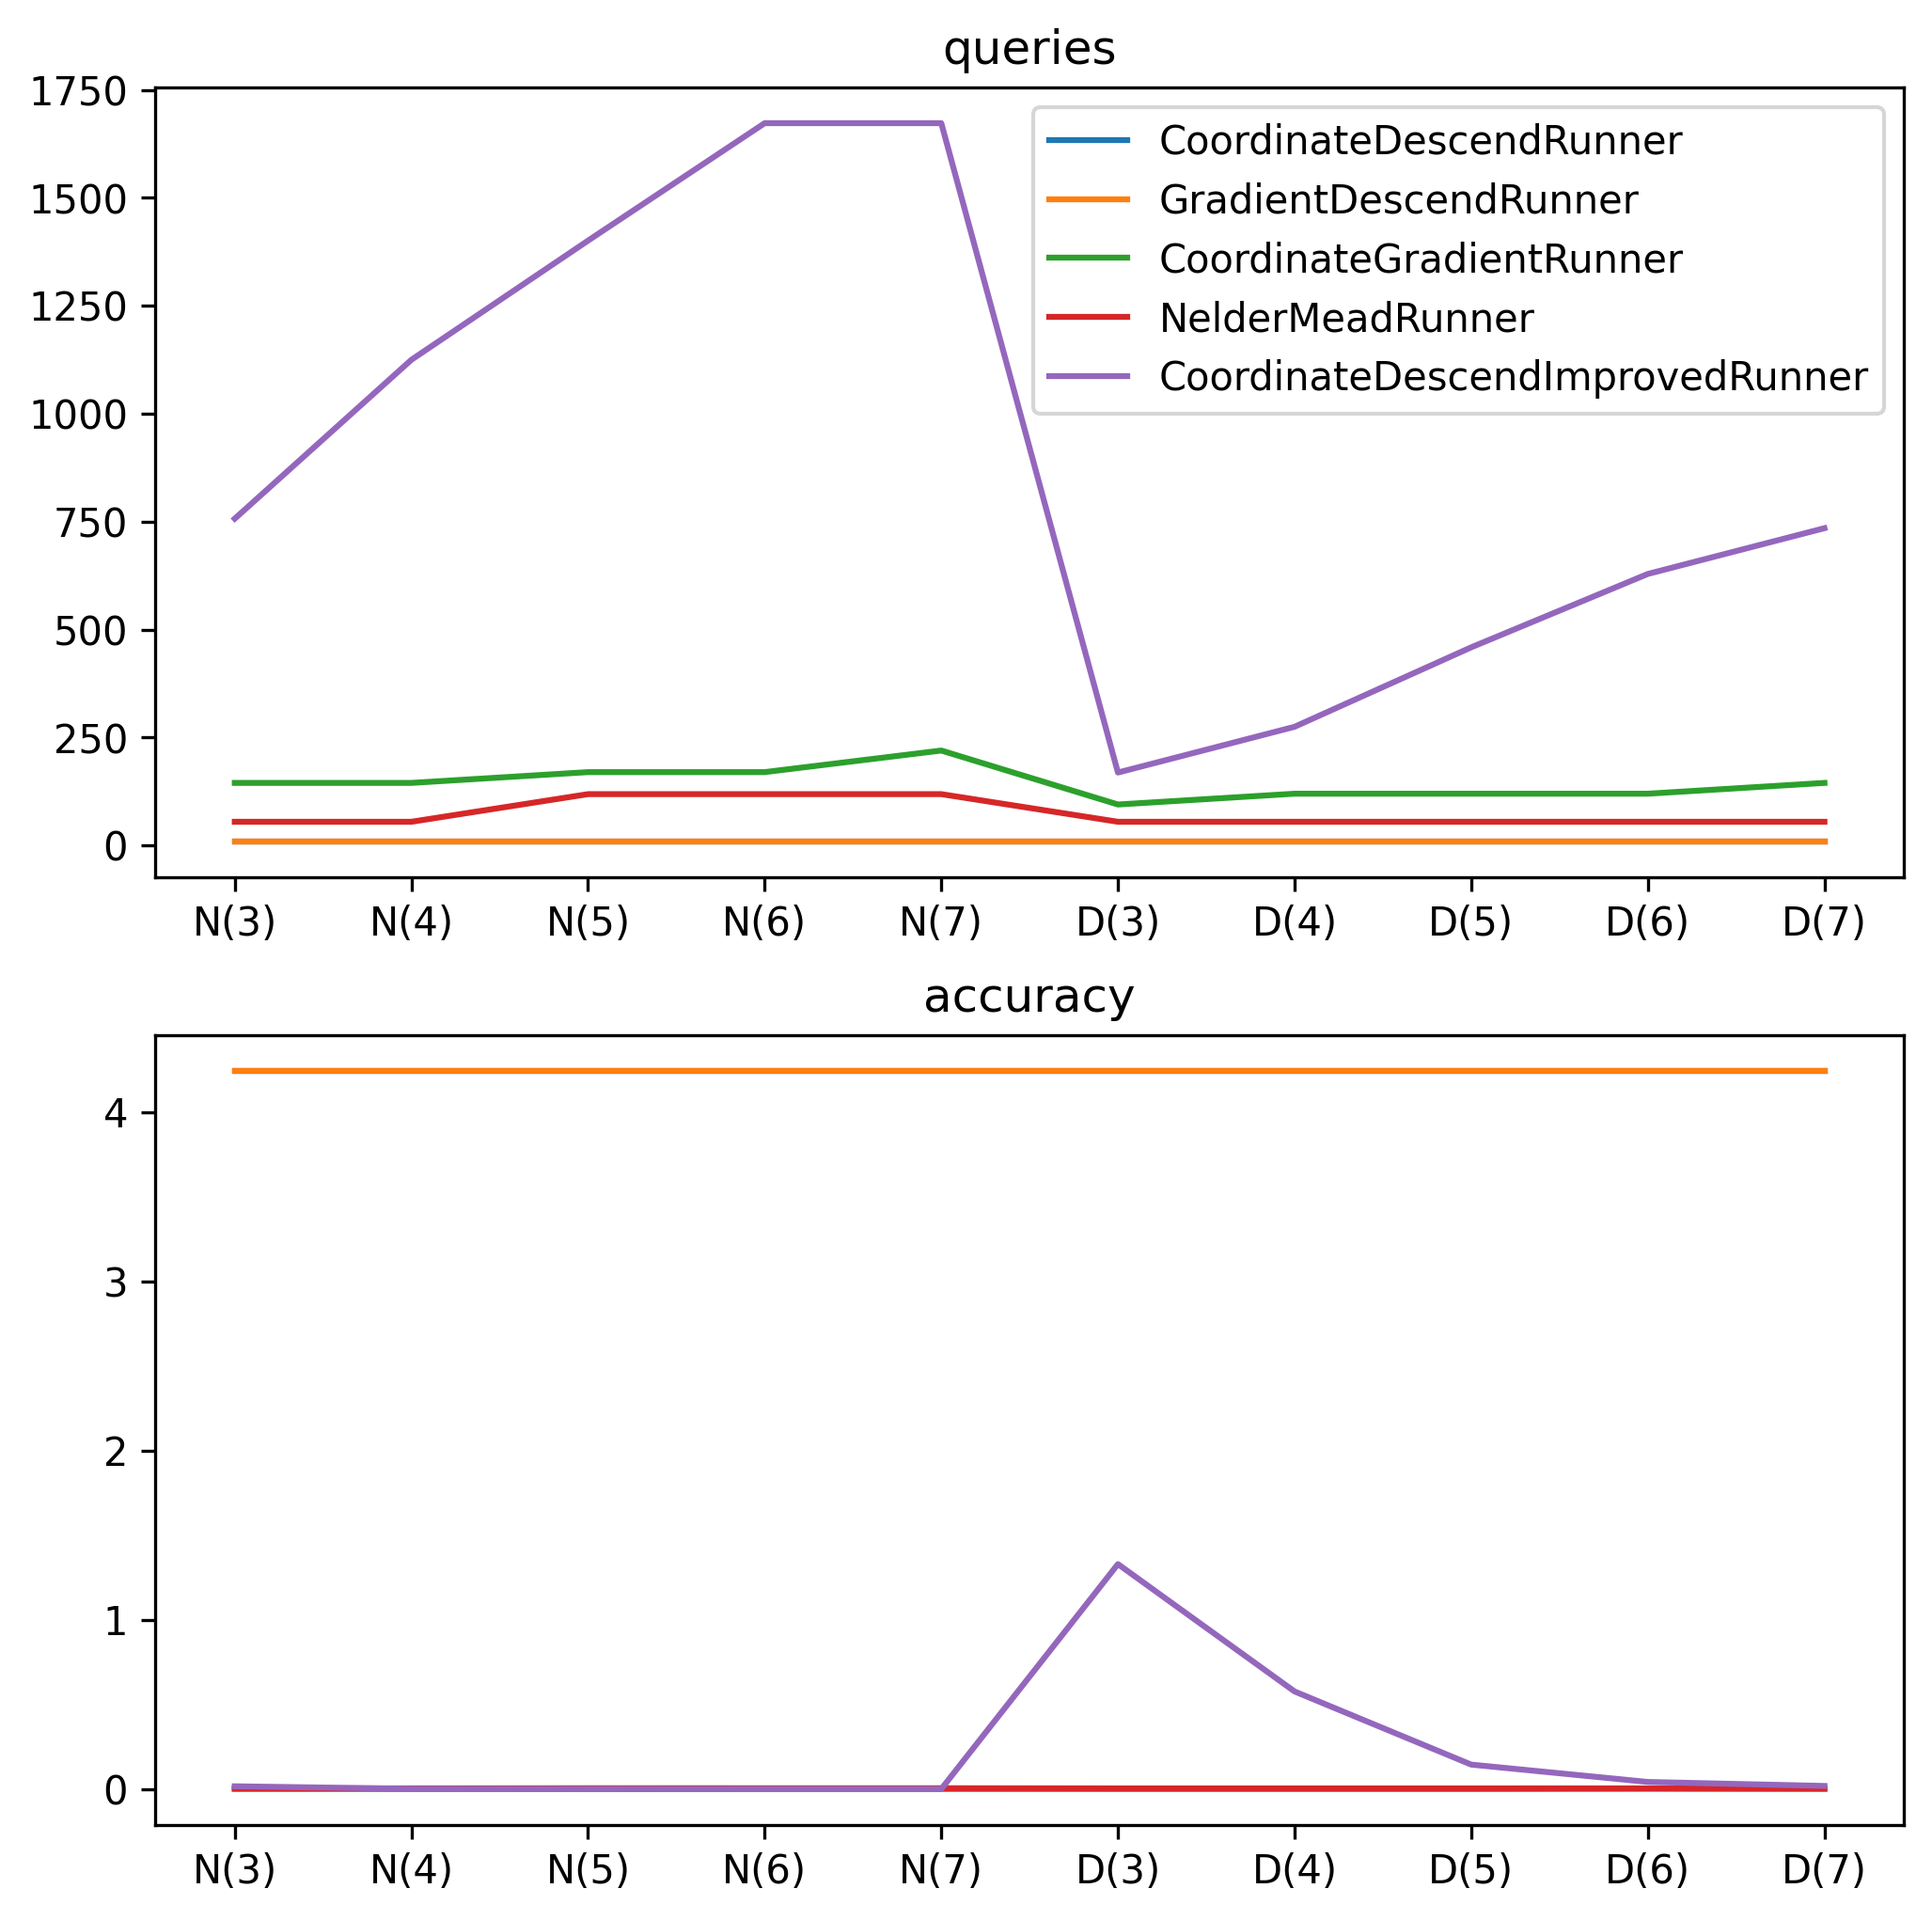

In [25]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy"), names)